In [2]:
import pandas as pd
import numpy as np
apps = pd.read_csv("/content/apps.csv")
reviews = pd.read_csv("/content/user_reviews.csv")
apps.info()
apps["Installs"] = apps["Installs"].str.replace("," , " ").str.replace("+","")
apps["Installs"] = pd.to_numeric(apps["Installs"],errors = "coerce")

apps["Price"] = apps["Price"].astype(str).str.replace("$","")
apps["Price"] = pd.to_numeric(apps["Price"],errors = "coerce")

apps["Reviews"] = pd.to_numeric(apps["Reviews"],errors = "coerce").fillna(0).astype(int)
apps["Rating"] = pd.to_numeric(apps["Rating"],errors = "coerce")

size = apps["Size"].astype(str)
#fills null values
size = size.replace("varies based on device", np.nan)
#removing k
m = size.str.endswith("M")
apps.loc[m,"Size"] = size[m].str.replace("M", "").astype(float)
#removing k
k = size.str.endswith("K")
apps.loc[k , "Size"] = size[k].str.replace("K", "").astype(float)/1024 # 1 mb = 1024kb
# nans to float
apps["Size"] = pd.to_numeric(apps["Size"],errors = "coerce")

# filling missing values with median
apps["Size"].fillna(apps["Size"].median(),inplace = True)

apps_cleaned = apps.dropna(subset=["Rating"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


/tmp/ipython-input-2-555492633.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps["Size"].fillna(apps["Size"].median(),inplace = True)


/tmp/ipython-input-3-4263197983.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index[:10],x =category_counts.values[:10],palette = "viridis")


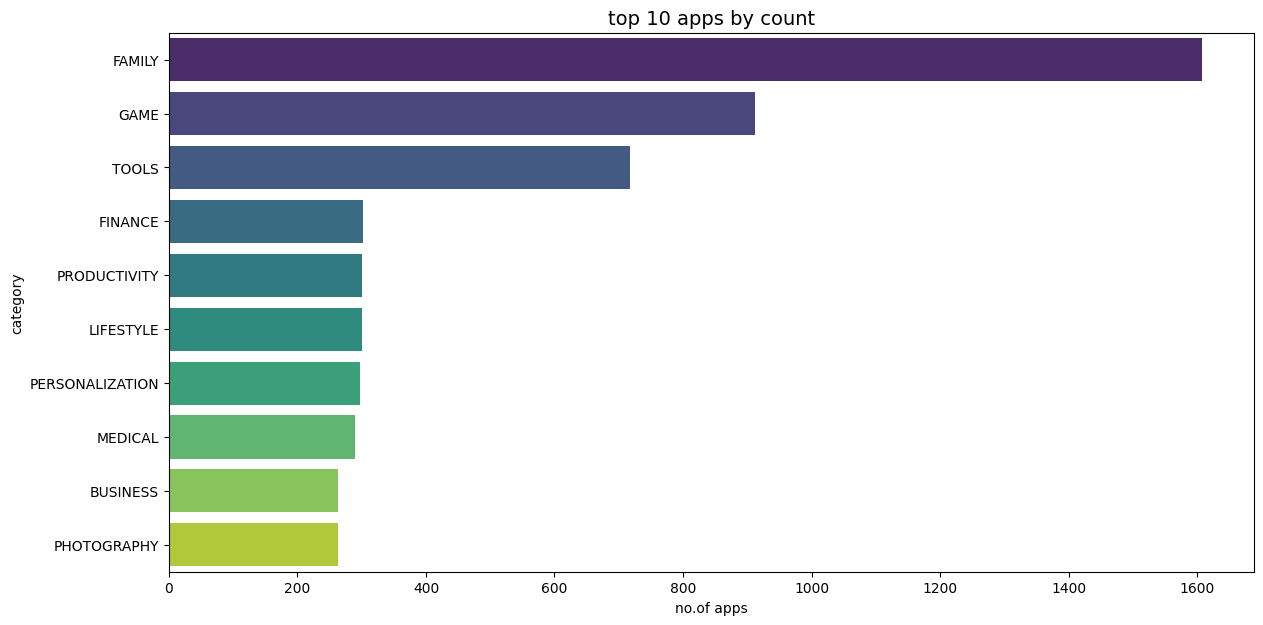

In [3]:
#category exploration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
category_counts = apps_cleaned['Category'].value_counts()
sns.barplot(y=category_counts.index[:10],x =category_counts.values[:10],palette = "viridis")
plt.title("top 10 apps by count", fontsize = 14)
plt.xlabel("no.of apps")
plt.ylabel("category")
plt.show()

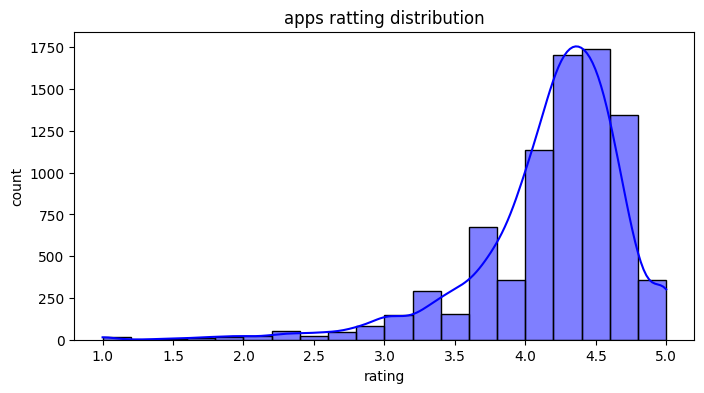

In [4]:
#metric analysis
plt.figure(figsize=(8,4))
sns.histplot(apps_cleaned["Rating"],bins = 20,kde = True,color = "blue")
plt.title("apps ratting distribution")
plt.xlabel("rating")
plt.ylabel("count")
plt.show()

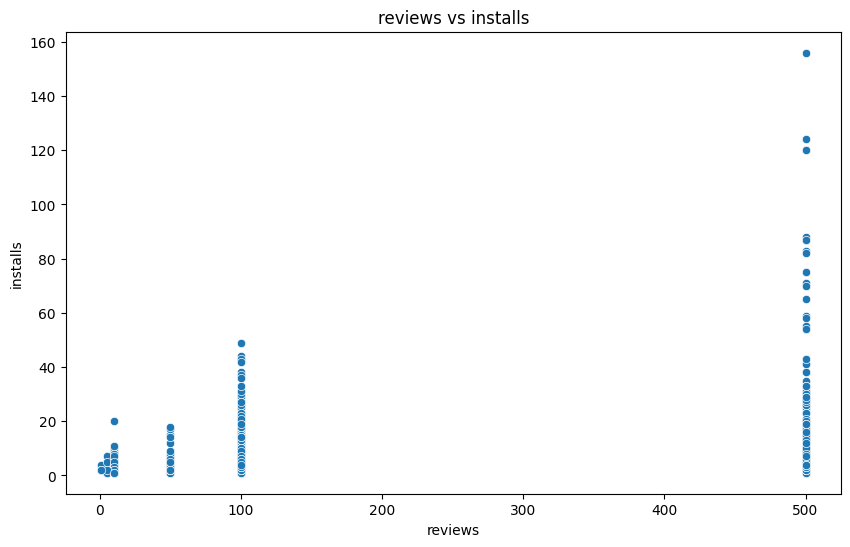

In [10]:
#reviews vs installs
plt.figure(figsize=(10,6))
sns.scatterplot(data=apps_cleaned , x= "Installs", y = "Reviews" , alpha = 1)
plt.title("reviews vs installs")
plt.xlabel("reviews")
plt.ylabel("installs")
plt.show()

/tmp/ipython-input-14-2261401651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=apps_cleaned,x= "Type", y= "Rating", palette = "Set2")


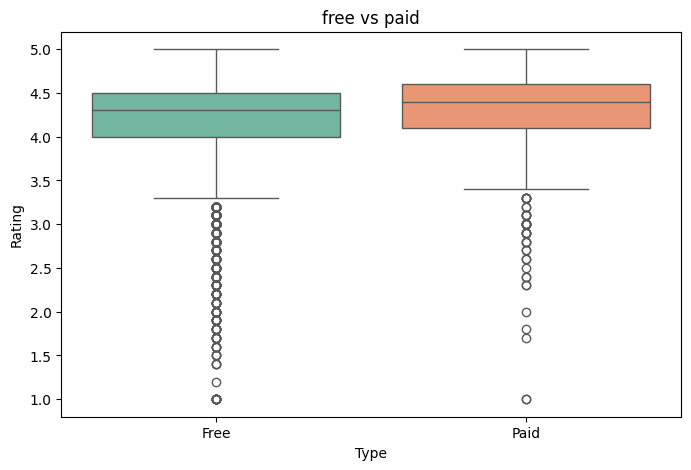

In [14]:
#free vs paid
plt.figure(figsize=(8,5))
sns.boxplot(data=apps_cleaned,x= "Type", y= "Rating", palette = "Set2")
plt.title("free vs paid")
plt.show()

/tmp/ipython-input-17-3535134492.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sentiment_counts.index , y = sentiment_counts.values , palette = "coolwarm")


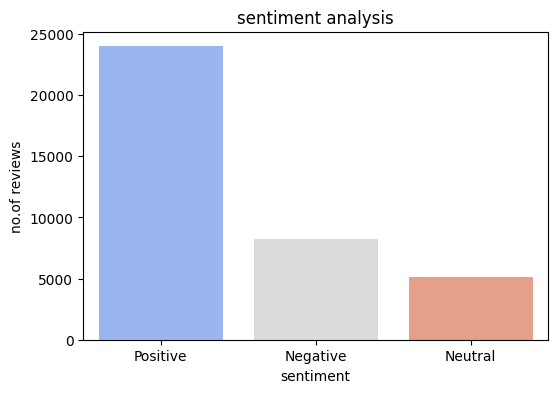

In [17]:
#sentiment analysis

reviews_cleaned = reviews.dropna(subset=["Translated_Review", "Sentiment"])
sentiment_counts = reviews_cleaned["Sentiment"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x = sentiment_counts.index , y = sentiment_counts.values , palette = "coolwarm")
plt.title("sentiment analysis")
plt.xlabel("sentiment")
plt.ylabel("no.of reviews")
plt.show()

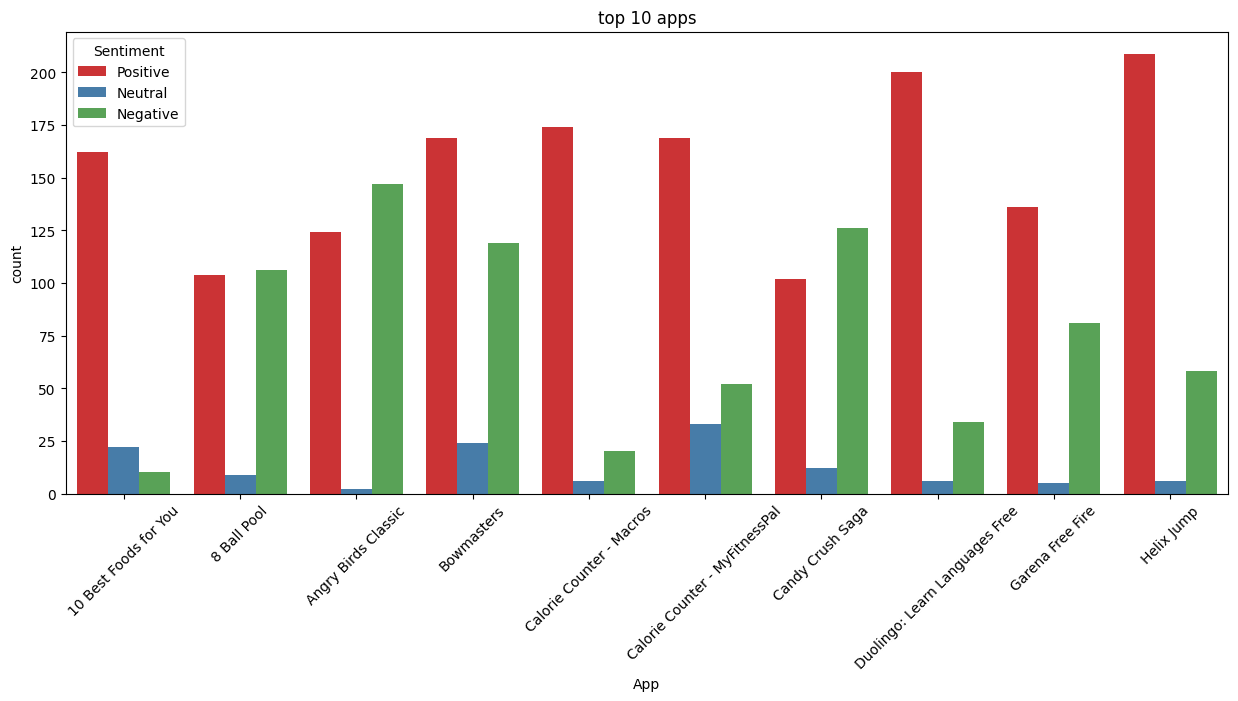

In [28]:
#sentiments analysis for top 10 apps
top_apps = reviews_cleaned["App"].value_counts().head(10).index
filtered_reviews = reviews_cleaned[reviews_cleaned["App"].isin(top_apps)]
plt.figure(figsize=(15,6))
sns.countplot(data = filtered_reviews ,  x ="App", hue = "Sentiment", palette = "Set1")
plt.title ("top 10 apps")
plt.xticks(rotation = 45)
plt.show()

In [30]:
#interactive visualization with plotly
import plotly.express as px
fig = px.scatter(apps_cleaned, x = "Installs", y = "Rating", size = "Reviews", color = "Category", log_x = True,title = "install vs reviews")
fig.show()